<a href="https://colab.research.google.com/github/HrgChampion/GenerativeAI/blob/main/bot_langGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade langchain langchain-community langgraph openai langchain_openai langchain_google_genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.2/440.2 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5

In [3]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START
from langchain_openai import ChatOpenAI
import requests
from langchain_core.messages import SystemMessage,HumanMessage
from langgraph.graph import MessagesState

from langgraph.prebuilt import ToolNode,tools_condition
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages




In [4]:
class State(TypedDict):
      messages:Annotated[list,add_messages]

In [5]:
!pip install -U duckduckgo-search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.1 MB/s eta 0:00:00


In [6]:
from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()
search.invoke("Obama's first name ?")

'List of presidents of the United StatesThe White House, official residence of the president of the United States The president of the United States is the head of state and head of government of the United States, [1] indirectly elected to a four-year term via the Electoral College. [2] Under the U.S. Constitution, the officeholder leads the executive branch of the federal government and is ... Barack Obama, the 44th President of the United States, broke barriers as the first African-American president and implemented significant healthcare reforms during his tenure. Other Facts The name Barack means "one who is blessed" in Swahili. Is the first African-American to be president of the Harvard Law Review. Nominated for three Grammy Awards, and won two ... Barack Obama is a name that resonates globally, but how much do you really know about him? Born on August 4, 1961, in Honolulu, Hawaii, he made history as the first African American President of the United States. Presidents of the Un

In [46]:
from langchain_community.tools import DuckDuckGoSearchRun

def search_duckduckgo(query:str):
      """Searches DuckDuckGo using LangChain's DuckDuckGoSearchRun tool."""
      search = DuckDuckGoSearchRun()
      return search.invoke(query)

result = search_duckduckgo("Delhi's wetaher today")
print(result)


New Delhi, India - Current temperature and weather conditions. Detailed hourly weather forecast for today - including weather conditions, temperature, pressure, humidity, precipitation, dewpoint, wind, visibility, and UV index data. Latest weather forecast for Delhi for today's, hourly weather forecast, including today's temperatures in Delhi, wind, rain and more. Delhi Weather Forecast. Providing a local hourly Delhi weather forecast of rain, sun, wind, humidity and temperature. The Long-range 12 day forecast also includes detail for Delhi weather today. Live weather reports from Delhi weather stations and weather warnings that include risk of thunder, high UV index and forecast gales. Get today's real-time weather updates in New Delhi with hourly temperatures and a weekly forecast. Find out about New Delhi's temperature trends, rain chances, air quality (AQI), and humidity ... Current weather in New Delhi and forecast for today, tomorrow, and next 14 days


In [25]:
def multiply(a:int,b:int) -> int:
      """Multiplies two integers."""
      return a*b

def add(a:int,b:int):
    """Adds two integers."""
    return a+b

In [27]:
# from langchain_openai import ChatOpenAI
# llm = ChatOpenAI(temperature=0,api_key="api key",model="gpt-4o-mini")
from langchain_google_genai import ChatGoogleGenerativeAI
import os

os.environ["GOOGLE_API_KEY"] = "AI************WY"

# Step 2: Create Gemini LLM
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash-latest",
    temperature=0.2,
    max_output_tokens=512,
)



In [28]:
llm.invoke("hello").content

'Hello there! How can I help you today?'

In [43]:
tools=[search_duckduckgo,add,multiply]
llm_with_tools=llm.bind_tools(tools)

In [30]:
def chatbot(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [31]:
from langgraph.prebuilt import ToolNode,tools_condition
graph_builder = StateGraph(State)

graph_builder.add_node("assistant",chatbot)
graph_builder.add_node("tools",ToolNode(tools))

graph_builder.add_edge(START,"assistant")
graph_builder.add_conditional_edges("assistant",tools_condition)
graph_builder.add_edge("tools","assistant")
react_graph= graph_builder.compile()

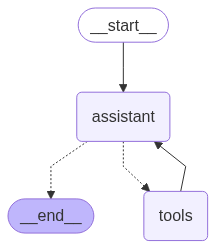

In [33]:
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [49]:
response = react_graph.invoke({"messages":[HumanMessage(content="Multiply 10 by 2 and add 5.What is the delhi's weather from the web search.")]})
print(response["messages"])

[HumanMessage(content="Multiply 10 by 2 and add 5.What is the delhi's weather from the web search.", additional_kwargs={}, response_metadata={}, id='450decff-0a0c-4b96-bdff-4834e47aac9a'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'search_duckduckgo', 'arguments': '{"query": "delhi\'s weather"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash-latest', 'safety_ratings': []}, id='run--2adc2f8c-a0c7-4cf8-875b-2b135129a865-0', tool_calls=[{'name': 'multiply', 'args': {'a': 10.0, 'b': 2.0}, 'id': '605a23a5-0d40-4d30-b2cf-e45c1a53aea2', 'type': 'tool_call'}, {'name': 'add', 'args': {'a': 20.0, 'b': 5.0}, 'id': '57346cef-2b73-48c4-90a1-d1c86060b386', 'type': 'tool_call'}, {'name': 'search_duckduckgo', 'args': {'query': "delhi's weather"}, 'id': '12e88d0e-93d1-47e4-aa35-7055295ea22a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 75, 'output_tokens': 21, 'total_tokens'

In [50]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

Multiply 10 by 2 and add 5.What is the delhi's weather from the web search.
================================== Ai Message ==================================
Tool Calls:
  multiply (605a23a5-0d40-4d30-b2cf-e45c1a53aea2)
 Call ID: 605a23a5-0d40-4d30-b2cf-e45c1a53aea2
  Args:
    a: 10.0
    b: 2.0
  add (57346cef-2b73-48c4-90a1-d1c86060b386)
 Call ID: 57346cef-2b73-48c4-90a1-d1c86060b386
  Args:
    a: 20.0
    b: 5.0
  search_duckduckgo (12e88d0e-93d1-47e4-aa35-7055295ea22a)
 Call ID: 12e88d0e-93d1-47e4-aa35-7055295ea22a
  Args:
    query: delhi's weather
================================= Tool Message =================================
Name: multiply

20
================================= Tool Message =================================
Name: add

25
================================= Tool Message =================================
Name: search_duckduckgo

New Delhi, India - Current temperature and weather condi